<a href="https://colab.research.google.com/github/jorgejrzoca/MVP_Analise_de_Dados_Jorge_Junior/blob/main/MVP_Analise_de_Dados_Jorge_Junior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

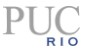

# **MVP Análise de Dados e Boas Práticas**

Jorge de Figueiredo Costa Junior
---


#1. Definição do problema

Para esse projeto foi utilizada a base de dados **Billionaires_Statistics_Dataset**. Essa base tem como objetivo trazer mais informações sobre esse grupo exclusivo e informaçõe importantes sobre o país de casa um.

Essa base de dados está disponivel no link: https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset




**Informações sobre os atributos:**
1. **rank:** A classificação do bilionário em termos de riqueza.
2. **finalWorth:** O patrimônio líquido final do bilionário em dólares.
3. **category:** A categoria ou setor em que atua o negócio do bilionário.
4. **personName:** Nome completo.
5. **age:** Idade.
6. **country:** O país em que reside.
7. **city:** A cidade em que reside.
8. **source:** A fonte da riqueza.
9. **industries:** As indústrias associadas aos interesses comerciais.
10. **countryOfCitizenship:** O país de cidadania.
11. **organization:** O nome da organização ou empresa associada ao bilionário.
12. **selfMade:** Indica se a fortuna foi construída (True/False).
13. **status:** "D" representa bilionários que se fizeram sozinhos (fundadores/empreendedores) e "U" indica riqueza herdada ou não conquistada.
14. **gender:** Gênero.
15. **birthDate:** A data de nascimento.
16. **lastName:** Último nome.
17. **firstName:** Primeiro nome.
18. **title:** O título do bilionário.
19. **date:** Data da coleta de dados.
20. **state:** Estado onde o bilionario reside.
21. **residenceStateRegion:** A região ou estado de residência do bilionário.
22. **birthYear:** O ano de nascimento.
23. **birthMonth:** O mês de nascimento.
24. **birthDay:** O dia de nascimento.
25. **cpi_country:** Índice de Preços ao Consumidor (IPC) do país do bilionário.
26. **cpi_change_country:** Alteração do IPC do país do bilionário.
27. **gross_tertiary_education_enrollment:** Inscrições no ensino superior no país do bilionário.
28. **gross_primary_education_enrollment_country:** Matrículas no ensino primário no país do bilionário.
29. **life_expectancy_country:** Expectativa de vida no país do bilionário.
30. **tax_revenue_country_country:** Receita tributária no país do bilionário.
31. **total_tax_rate_country:** Alíquota total de impostos no país do bilionário.
32. **population_country:** População do país do bilionário.
33. **latitude_country:** Coordenada de latitude do país do bilionário.
34. **longitude_country:** Coordenada de longitude do país do bilionário.

Vamos começar importando as bibliotecas que serão utilizadas no projeto e ignorar os warning

In [25]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
import plotly.express as px
import folium
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from folium.plugins import HeatMap
from geopy.distance import great_circle
from folium.plugins import HeatMapWithTime

# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# 2. Carga de Dados

A etapa de carga de dados começou com a extração da base do Kaggle. Para facilitar o acesso, foi criado um repositório no GitHub permitindo uma integração com o ambiente Google Colab.

In [26]:
# Carregando arquivo csv usando Pandas usando uma URL

# URL de importação da base de dados
url = "https://raw.githubusercontent.com/jorgejrzoca/MVP_Analise_de_Dados_Jorge_Junior/main/Billionaires_Statistics_Dataset.csv"


# Lê o arquivo utilizando as colunas informadas
df_bilionarios = pd.read_csv(url, delimiter=';', encoding='latin1')

In [27]:
# Exibindo os dados carregados

df_bilionarios.head()

ï»¿rank  final_worth               category               person_name  \
0        1       211000       Fashion & Retail  Bernard Arnault & family   
1        2       180000             Automotive                 Elon Musk   
2        3       114000             Technology                Jeff Bezos   
3        4       107000             Technology             Larry Ellison   
4        5       106000  Finance & Investments            Warren Buffett   

    age        country    city                        source  \
0  74.0         France   Paris                          LVMH   
1  51.0  United States  Austin                Tesla & SpaceX   
2  59.0  United States  Medina   Beverages & pharmaceuticals   
3  78.0  United States   Lanai  Infrastructure & commodities   
4  92.0  United States   Omaha          Nutella & chocolates   

              industries country_of_citizen_ship  ... cpi_country  \
0       Fashion & Retail                  France  ...      110.05   
1             Automotive           United States  ...      117.24   
2             Technology           United States  ...      117.24   
3             Technology           United States  ...      117.24   
4  Finance & Investments           United States  ...      117.24   

   cpi_change_country gross_tertiary_education_enrollment  \
0                 1.1                                65.6   
1                 7.5                                88.2   
2                 7.5                                88.2   
3                 7.5                                88.2   
4                 7.5                                88.2   

  gross_primary_education_enrollment_country life_expectancy_country  \
0                                      102.5                    82.5   
1                                      101.8                    78.5   
2                                      101.8                    78.5   
3                                      101.8                    78.5   
4                                      101.8                    78.5   

  tax_revenue_country_country total_tax_rate_country population_country  \
0                        24.2                   60.7         67059887.0   
1                         9.6                   36.6        328239523.0   
2                         9.6                   36.6        328239523.0   
3                         9.6                   36.6        328239523.0   
4                         9.6                   36.6        328239523.0   

  latitude_country longitude_country  
0       46.227.638         2.213.749  
1        3.709.024       -95.712.891  
2        3.709.024       -95.712.891  
3        3.709.024       -95.712.891  
4        3.709.024       -95.712.891  

[5 rows x 34 columns]

# 3. Análise de Dados

## 3.1 Estatísticas Descritivas

Vamos iniciar examinando as dimensões do dataset.

In [28]:
# Mostra as dimensões do dataset
print(df_bilionarios.shape)

(2640, 34)


In [29]:
# Mostra as informações do dataset
print(df_bilionarios.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   ï»¿rank                                     2640 non-null   int64  
 1   final_worth                                 2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   person_name                                 2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   country_of_citizen_ship                     2640 non-null   object 
 10  organization

Nota-se que apresentou um erro no nome da coluna rank e precisa ser alterado. Segue abaixo código para correção.

In [30]:
# Mudar o nome da coluna rank que está apresentando erro

df_bilionarios.rename(columns={'ï»¿rank': 'rank'}, inplace=True)

# Imprimir após alteração
print(df_bilionarios.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   final_worth                                 2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   person_name                                 2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   country_of_citizen_ship                     2640 non-null   object 
 10  organization

In [31]:
# Alterando o Dtype da latitude e longitude para float64

df_bilionarios['latitude_country'] = df_bilionarios['latitude_country'].str.replace('.', '').astype(float)
df_bilionarios['longitude_country'] = df_bilionarios['longitude_country'].str.replace('.', '').astype(float)

In [32]:
# Mostra as 10 primeiras linhas do dataset
df_bilionarios.head(10)

rank  final_worth               category                person_name   age  \
0     1       211000       Fashion & Retail   Bernard Arnault & family  74.0   
1     2       180000             Automotive                  Elon Musk  51.0   
2     3       114000             Technology                 Jeff Bezos  59.0   
3     4       107000             Technology              Larry Ellison  78.0   
4     5       106000  Finance & Investments             Warren Buffett  92.0   
5     6       104000             Technology                 Bill Gates  67.0   
6     7        94500  Media & Entertainment          Michael Bloomberg  81.0   
7     8        93000                Telecom  Carlos Slim Helu & family  83.0   
8     9        83400            Diversified              Mukesh Ambani  65.0   
9    10        80700             Technology              Steve Ballmer  67.0   

         country         city                        source  \
0         France        Paris                          LVMH   
1  United States       Austin                Tesla & SpaceX   
2  United States       Medina   Beverages & pharmaceuticals   
3  United States        Lanai  Infrastructure & commodities   
4  United States        Omaha          Nutella & chocolates   
5  United States       Medina              Candy & pet food   
6  United States     New York              Candy & pet food   
7         Mexico  Mexico City             Music & chemicals   
8          India       Mumbai         Trading & investments   
9  United States  Hunts Point         BMW & pharmaceuticals   

              industries country_of_citizen_ship  ... cpi_country  \
0       Fashion & Retail                  France  ...      110.05   
1             Automotive           United States  ...      117.24   
2             Technology           United States  ...      117.24   
3             Technology           United States  ...      117.24   
4  Finance & Investments           United States  ...      117.24   
5             Technology           United States  ...      117.24   
6  Media & Entertainment           United States  ...      117.24   
7                Telecom                  Mexico  ...      141.54   
8            Diversified                   India  ...      180.44   
9             Technology           United States  ...      117.24   

   cpi_change_country gross_tertiary_education_enrollment  \
0                 1.1                                65.6   
1                 7.5                                88.2   
2                 7.5                                88.2   
3                 7.5                                88.2   
4                 7.5                                88.2   
5                 7.5                                88.2   
6                 7.5                                88.2   
7                 3.6                                40.2   
8                 7.7                                28.1   
9                 7.5                                88.2   

  gross_primary_education_enrollment_country life_expectancy_country  \
0                                      102.5                    82.5   
1                                      101.8                    78.5   
2                                      101.8                    78.5   
3                                      101.8                    78.5   
4                                      101.8                    78.5   
5                                      101.8                    78.5   
6                                      101.8                    78.5   
7                                      105.8                    75.0   
8                                      113.0                    69.4   
9                                      101.8                    78.5   

  tax_revenue_country_country total_tax_rate_country population_country  \
0                        24.2                   60.7       6.705989e+07   
1                         9.6                   36.6 

In [33]:
# Mostra as 10 últimas linhas do dataset
df_bilionarios.tail(10)

rank  final_worth          category             person_name   age  \
2630  2540         1000     Manufacturing      Franziska Wuerbser  35.0   
2631  2540         1000  Fashion & Retail  Xie Bingzheng & family  54.0   
2632  2540         1000     Manufacturing                 Xu Gang  59.0   
2633  2540         1000     Manufacturing               Yan Junxu  53.0   
2634  2540         1000        Healthcare   Yi Xianzhong & family  63.0   
2635  2540         1000        Healthcare                 Yu Rong  51.0   
2636  2540         1000   Food & Beverage   Richard Yuengling Jr.  80.0   
2637  2540         1000     Manufacturing           Zhang Gongyun  60.0   
2638  2540         1000       Real Estate  Zhang Guiping & family  71.0   
2639  2540         1000       Diversified             Inigo Zobel  66.0   

            country        city                        source  \
2630            NaN         NaN            Kitchen appliances   
2631          China   Guangzhou                       Apparel   
2632          China     Jiaozuo                     Chemicals   
2633          China     Taicang                 Manufacturing   
2634          China   Guangzhou               Pharmaceuticals   
2635          China    Shanghai                Health clinics   
2636  United States  Pottsville                          Beer   
2637          China       Gaomi  Tyre manufacturing machinery   
2638          China     Nanjing                   Real estate   
2639    Philippines      Makati                   Diversified   

            industries country_of_citizen_ship  ... cpi_country  \
2630     Manufacturing                 Germany  ...         NaN   
2631  Fashion & Retail                   China  ...      125.08   
2632     Manufacturing                   China  ...      125.08   
2633     Manufacturing                   China  ...      125.08   
2634        Healthcare                   China  ...      125.08   
2635        Healthcare                   China  ...      125.08   
2636   Food & Beverage           United States  ...      117.24   
2637     Manufacturing                   China  ...      125.08   
2638       Real Estate                   China  ...      125.08   
2639       Diversified             Philippines  ...      129.61   

      cpi_change_country gross_tertiary_education_enrollment  \
2630                 NaN                                 NaN   
2631                 2.9                                50.6   
2632                 2.9                                50.6   
2633                 2.9                                50.6   
2634                 2.9                                50.6   
2635                 2.9                                50.6   
2636                 7.5                                88.2   
2637                 2.9                                50.6   
2638                 2.9                                50.6   
2639                 2.5                                35.5   

     gross_primary_education_enrollment_country life_expectancy_country  \
2630                                        NaN                     NaN   
2631                                      100.2                    77.0   
2632                                      100.2                    77.0   
2633                                      100.2                    77.0   
2634                                      100.2                    77.0   
2635                                      100.2                    77.0   
2636                                      101.8                    78.5   
2637                                      100.2                    77.0   
2638                                      100.2                    77.0   
2639                                      107.5                    71.1   

     tax_revenue_country_country total_tax_rate_country population_country  \
2630                         NaN                    NaN                NaN   
2631                         9.4       

In [34]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
df_bilionarios.describe()

rank    final_worth          age    birthYear   birthMonth  \
count  2640.000000    2640.000000  2575.000000  2564.000000  2564.000000   
mean   1289.159091    4623.787879    65.140194  1957.183307     5.740250   
std     739.693726    9834.240939    13.258098    13.282516     3.710085   
min       1.000000    1000.000000    18.000000  1921.000000     1.000000   
25%     659.000000    1500.000000    56.000000  1948.000000     2.000000   
50%    1312.000000    2300.000000    65.000000  1957.000000     6.000000   
75%    1905.000000    4200.000000    75.000000  1966.000000     9.000000   
max    2540.000000  211000.000000   101.000000  2004.000000    12.000000   

          birthDay  cpi_country  cpi_change_country  \
count  2564.000000  2456.000000         2456.000000   
mean     12.099844   127.755204            4.364169   
std       9.918876    26.452951            3.623763   
min       1.000000    99.550000           -1.900000   
25%       1.000000   117.240000            1.700000   
50%      11.000000   117.240000            2.900000   
75%      21.000000   125.080000            7.500000   
max      31.000000   288.570000           53.500000   

       gross_tertiary_education_enrollment  \
count                          2458.000000   
mean                             67.225671   
std                              21.343426   
min                               4.000000   
25%                              50.600000   
50%                              65.600000   
75%                              88.200000   
max                             136.600000   

       gross_primary_education_enrollment_country  life_expectancy_country  \
count                                 2459.000000              2458.000000   
mean                                   102.858520                78.122823   
std                                      4.710977                 3.730099   
min                                     84.700000                54.300000   
25%                                    100.200000                77.000000   
50%                                    101.800000                78.500000   
75%                                    102.600000                80.900000   
max                                    142.100000                84.200000   

       tax_revenue_country_country  total_tax_rate_country  \
count                  2457.000000             2458.000000   
mean                     12.546235               43.963344   
std                       5.368625               12.145296   
min                       0.100000                9.900000   
25%                       9.600000               36.600000   
50%                       9.600000               41.200000   
75%                      12.800000               59.100000   
max                      37.200000              106.300000   

       population_country  latitude_country  longitude_country  
count        2.476000e+03      2.476000e+03       2.476000e+03  
mean         5.102053e+08      1.795795e+07       9.038743e+06  
std          5.542447e+08      4.161073e+07       8.482442e+07  
min          3.801900e+04     -4.090056e+07      -1.063468e+08  
25%          6.683440e+07      3.586166e+06      -9.571289e+07  
50%          3.282395e+08      3.709024e+06       7.896288e+06  
75%          1.366418e+09      2.535483e+07       1.041954e+08  
max          1.397715e+09      4.714104e+08       1.748860e+08

## 3.2 Visualizações Unimodais

Vamos criar um histograma para os atributos do dataset.


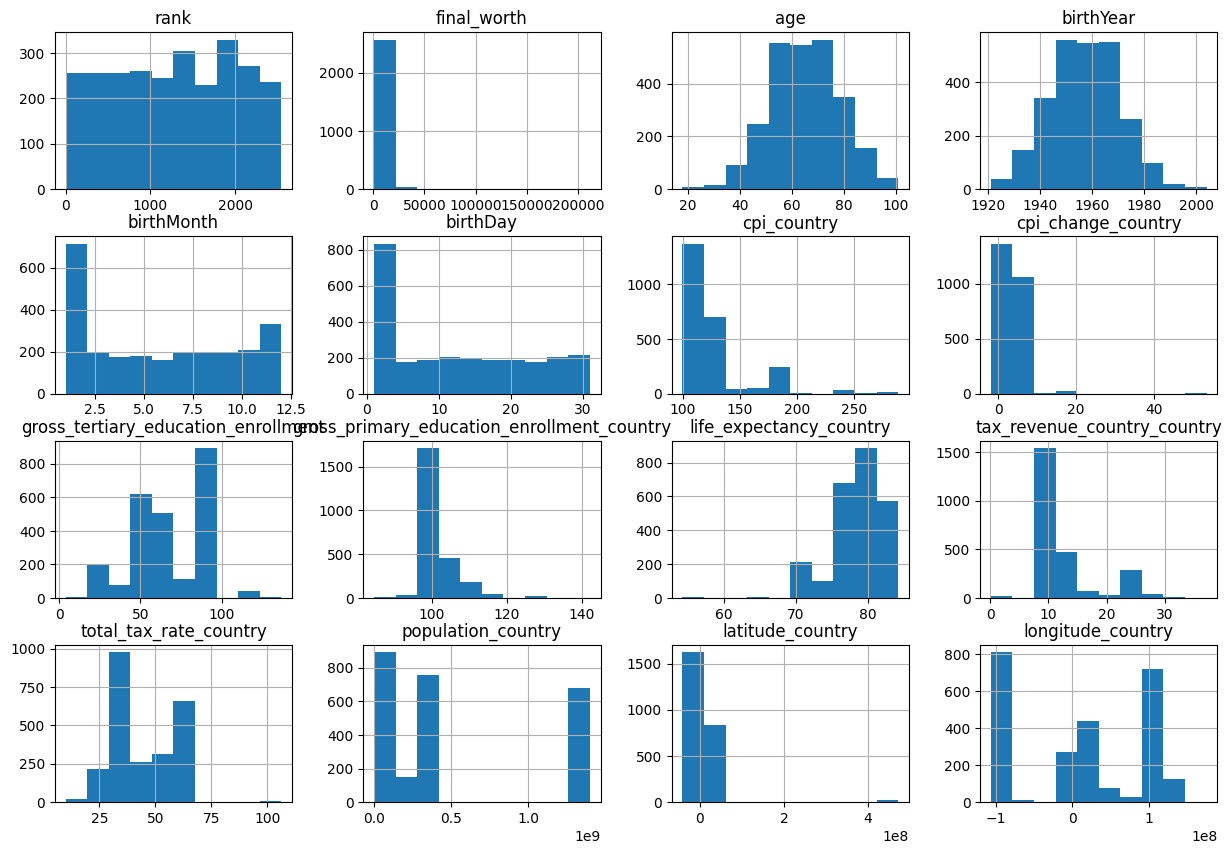

In [35]:
# Histograma
df_bilionarios.hist(figsize = (15,10))


plt.show()

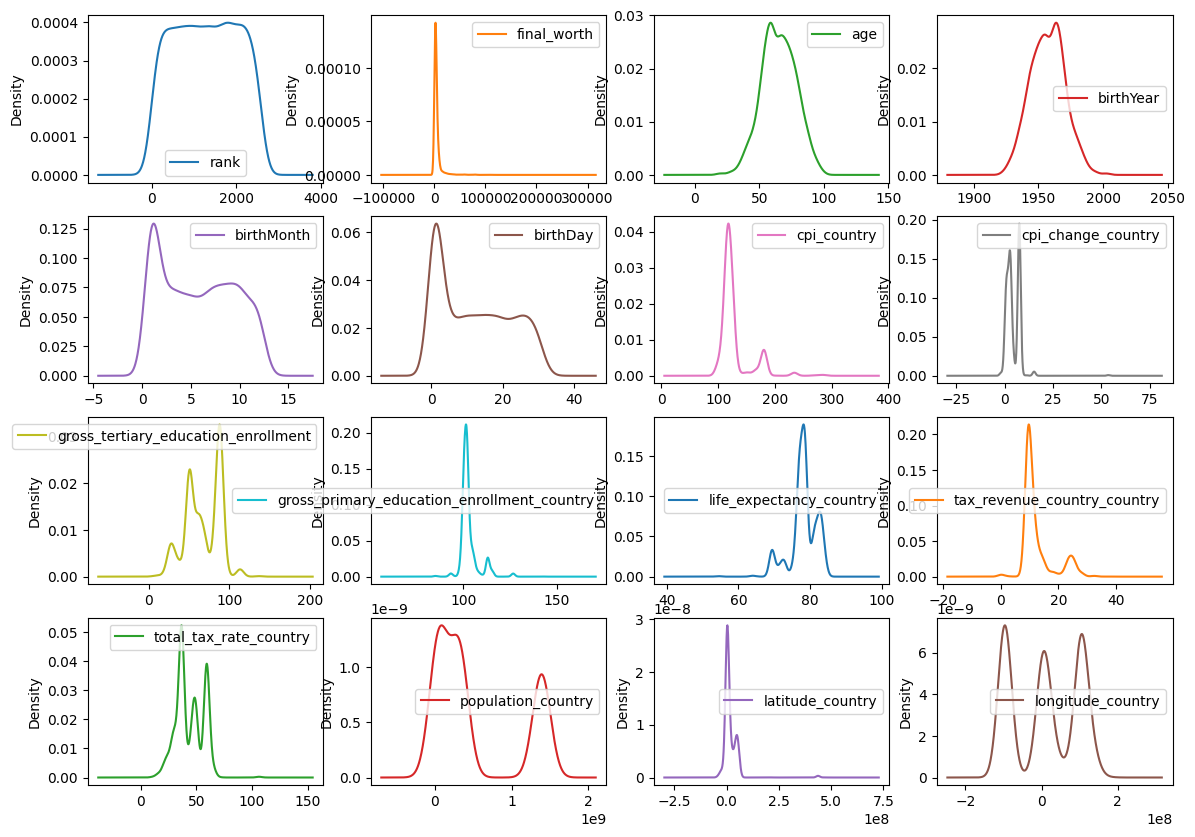

In [36]:
# Density Plot
df_bilionarios.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(14, 10))

plt.show()

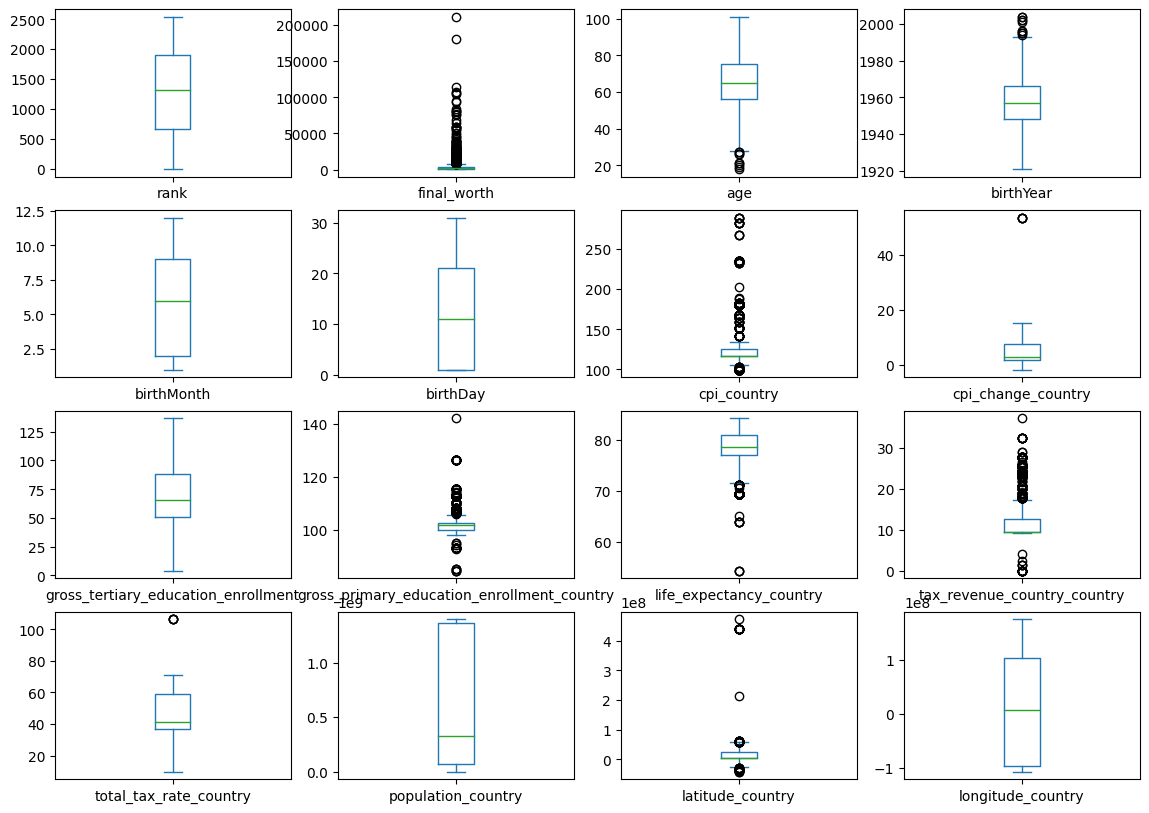

In [37]:
# Boxplot
df_bilionarios.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize = (14,10))
plt.show()

## 3.3 Visualizações Multimodais

Vamos verificar as correlações entre atributos através da matriz de correlação


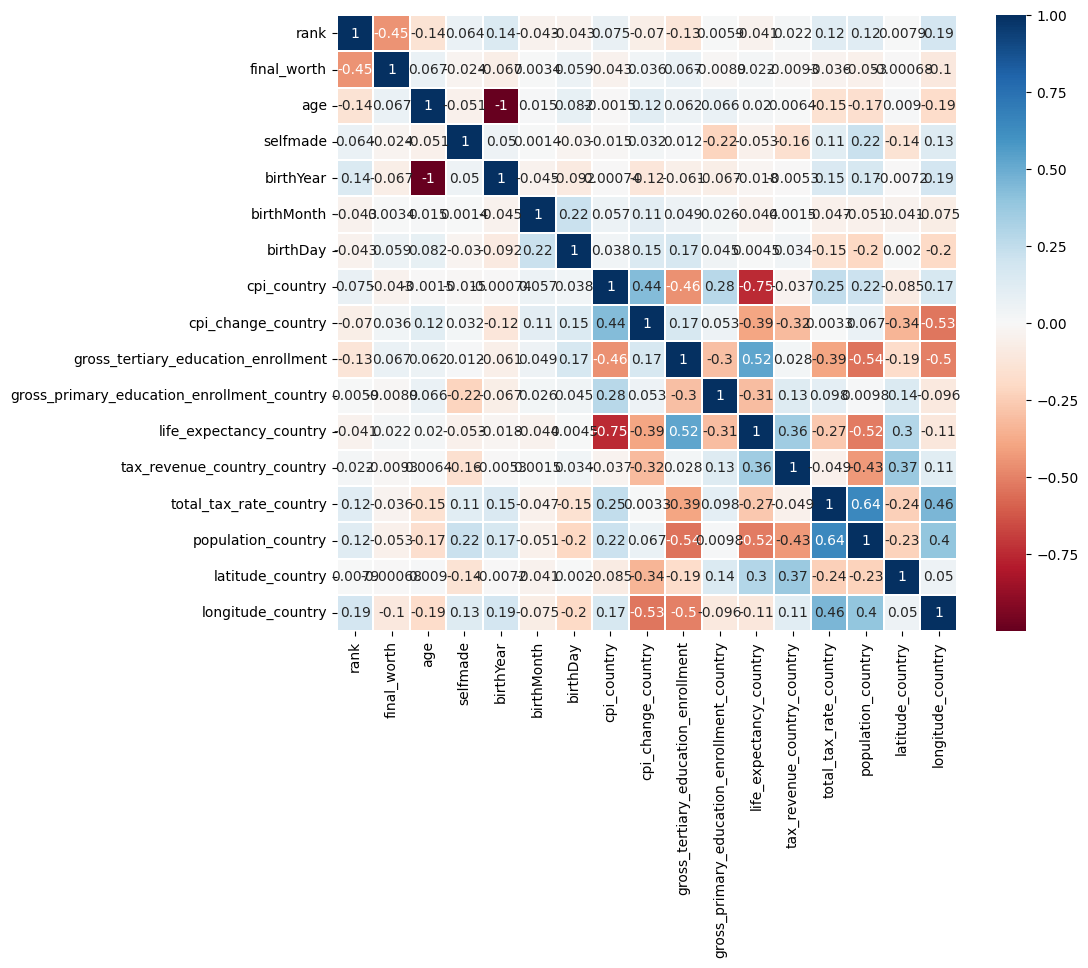

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_bilionarios.corr(), annot=True, cmap='RdBu', linewidths=.3)
plt.show()

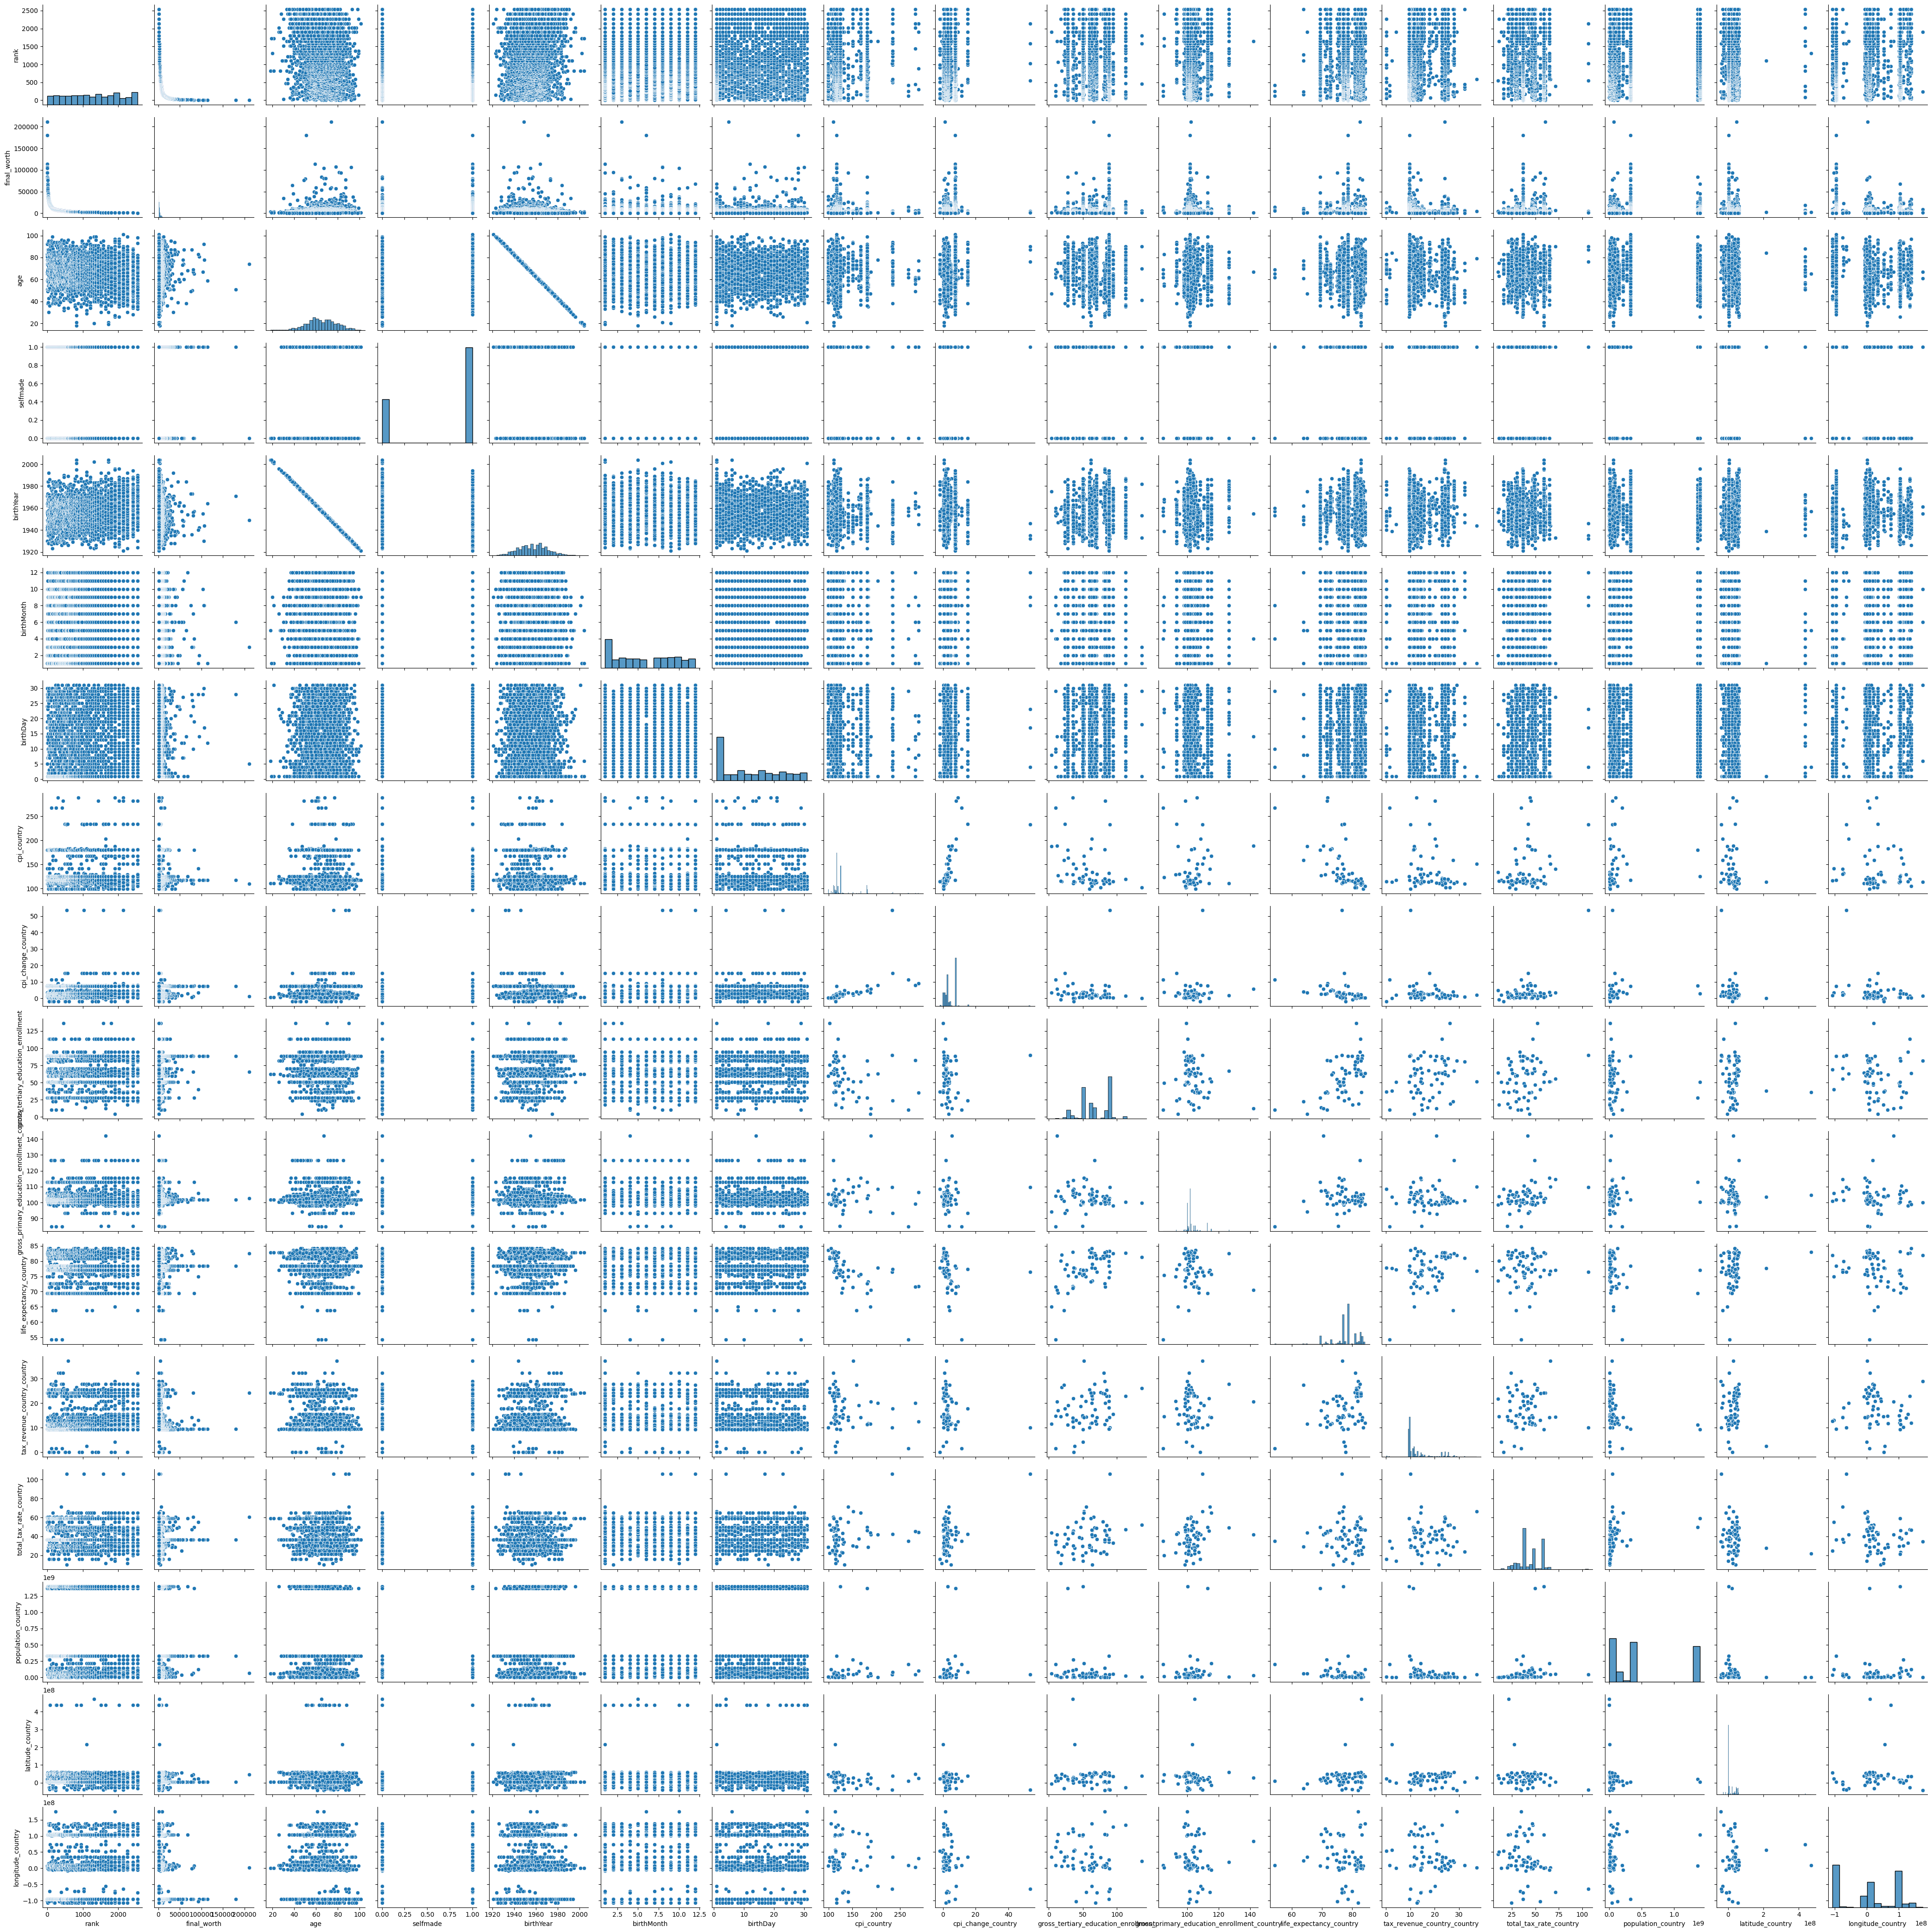

In [15]:
sns.pairplot(df_bilionarios, height=2.5)

# 4. Pré-processamento de dados

Nesse processo vamos realizar operações para tratamento de valores faltantes, limpeza de dados, alteração de d-type, entre outras.


## 4.1 Tratamento de missings e limpeza

In [39]:
# Verificando nulls no dataset

df_bilionarios.isnull().sum()

rank                                             0
final_worth                                      0
category                                         0
person_name                                      0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
country_of_citizen_ship                          0
organization                                  2315
selfmade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                          

In [40]:
# salvando um NOVO dataset para tratamento de missings (cuidado para não sobrescrever o dataset original!)

df_bilionarios_clean = df_bilionarios.copy()

In [41]:
# alterando os valores das colunas age, birthMonth, birthDay, cpi_country, cpi_change_country, gross_tertiary_education_enrollment, life_expectancy_country,
# tax_revenue_country_country, total_tax_rate_country, population_country, latitude_country e longitudee_country para que os valores faltantes assumam o valor médio.

df_bilionarios_clean["age"]= df_bilionarios_clean["age"]= df_bilionarios_clean["age"].fillna(df_bilionarios_clean["age"].median())
df_bilionarios_clean["birthMonth"] = df_bilionarios_clean["birthMonth"].fillna(df_bilionarios_clean["birthMonth"].median())
df_bilionarios_clean["birthDay"] = df_bilionarios_clean["birthDay"].fillna(df_bilionarios_clean["birthDay"].median())
df_bilionarios_clean["cpi_country"] = df_bilionarios_clean["cpi_country"].fillna(df_bilionarios_clean["cpi_country"].median())
df_bilionarios_clean["cpi_change_country"] = df_bilionarios_clean["cpi_change_country"].fillna(df_bilionarios_clean["cpi_change_country"].median())
df_bilionarios_clean["gross_tertiary_education_enrollment"] = df_bilionarios_clean["gross_tertiary_education_enrollment"].fillna(df_bilionarios_clean["gross_tertiary_education_enrollment"].mean())
df_bilionarios_clean["gross_primary_education_enrollment_country"] = df_bilionarios_clean["gross_primary_education_enrollment_country"].fillna(df_bilionarios_clean["gross_primary_education_enrollment_country"].median())
df_bilionarios_clean["life_expectancy_country"] = df_bilionarios_clean["life_expectancy_country"].fillna(df_bilionarios_clean["life_expectancy_country"].mean())
df_bilionarios_clean["tax_revenue_country_country"] = df_bilionarios_clean["tax_revenue_country_country"].fillna(df_bilionarios_clean["tax_revenue_country_country"].median())
df_bilionarios_clean["total_tax_rate_country"] = df_bilionarios_clean["total_tax_rate_country"].fillna(df_bilionarios_clean["total_tax_rate_country"].median())
df_bilionarios_clean["population_country"] = df_bilionarios_clean["population_country"].fillna(df_bilionarios_clean["population_country"].median())
df_bilionarios_clean["latitude_country"] = df_bilionarios_clean["latitude_country"].fillna(df_bilionarios_clean["latitude_country"].median())
df_bilionarios_clean["longitude_country"] = df_bilionarios_clean["longitude_country"].fillna(df_bilionarios_clean["longitude_country"].median())

# alterando os valores faltantes das colunas birthDate as colunas para desconhecido

df_bilionarios_clean['birthDate'].fillna("Unknwon")
df_bilionarios_clean['birthYear'].fillna("Unknwon")

# alterando os valores faltantes das colunas country, city, organization, title, state, residenceStateRegion e firstName para Nao especificado

df_bilionarios_clean["country"] = df_bilionarios_clean["country"].fillna("Nao especificado")
df_bilionarios_clean["city"] = df_bilionarios_clean["city"].fillna("Nao especificado")
df_bilionarios_clean["organization"] = df_bilionarios_clean["organization"].fillna("Nao especificado")
df_bilionarios_clean["title"] = df_bilionarios_clean["title"].fillna("Nao especificado")
df_bilionarios_clean["state"] = df_bilionarios_clean["state"].fillna("Nao especificado")
df_bilionarios_clean["residenceStateRegion"] = df_bilionarios_clean["residenceStateRegion"].fillna("Nao especificado")
df_bilionarios_clean["firstName"]= df_bilionarios_clean["firstName"].fillna("Não especificado")

In [42]:
# Verificando nulls no dataset

df_bilionarios_clean.isnull().sum()

rank                                           0
final_worth                                    0
category                                       0
person_name                                    0
age                                            0
country                                        0
city                                           0
source                                         0
industries                                     0
country_of_citizen_ship                        0
organization                                   0
selfmade                                       0
status                                         0
gender                                         0
birthDate                                     76
lastName                                       0
firstName                                      0
title                                          0
date                                           0
state                                          0
residenceStateRegion

<Axes: >

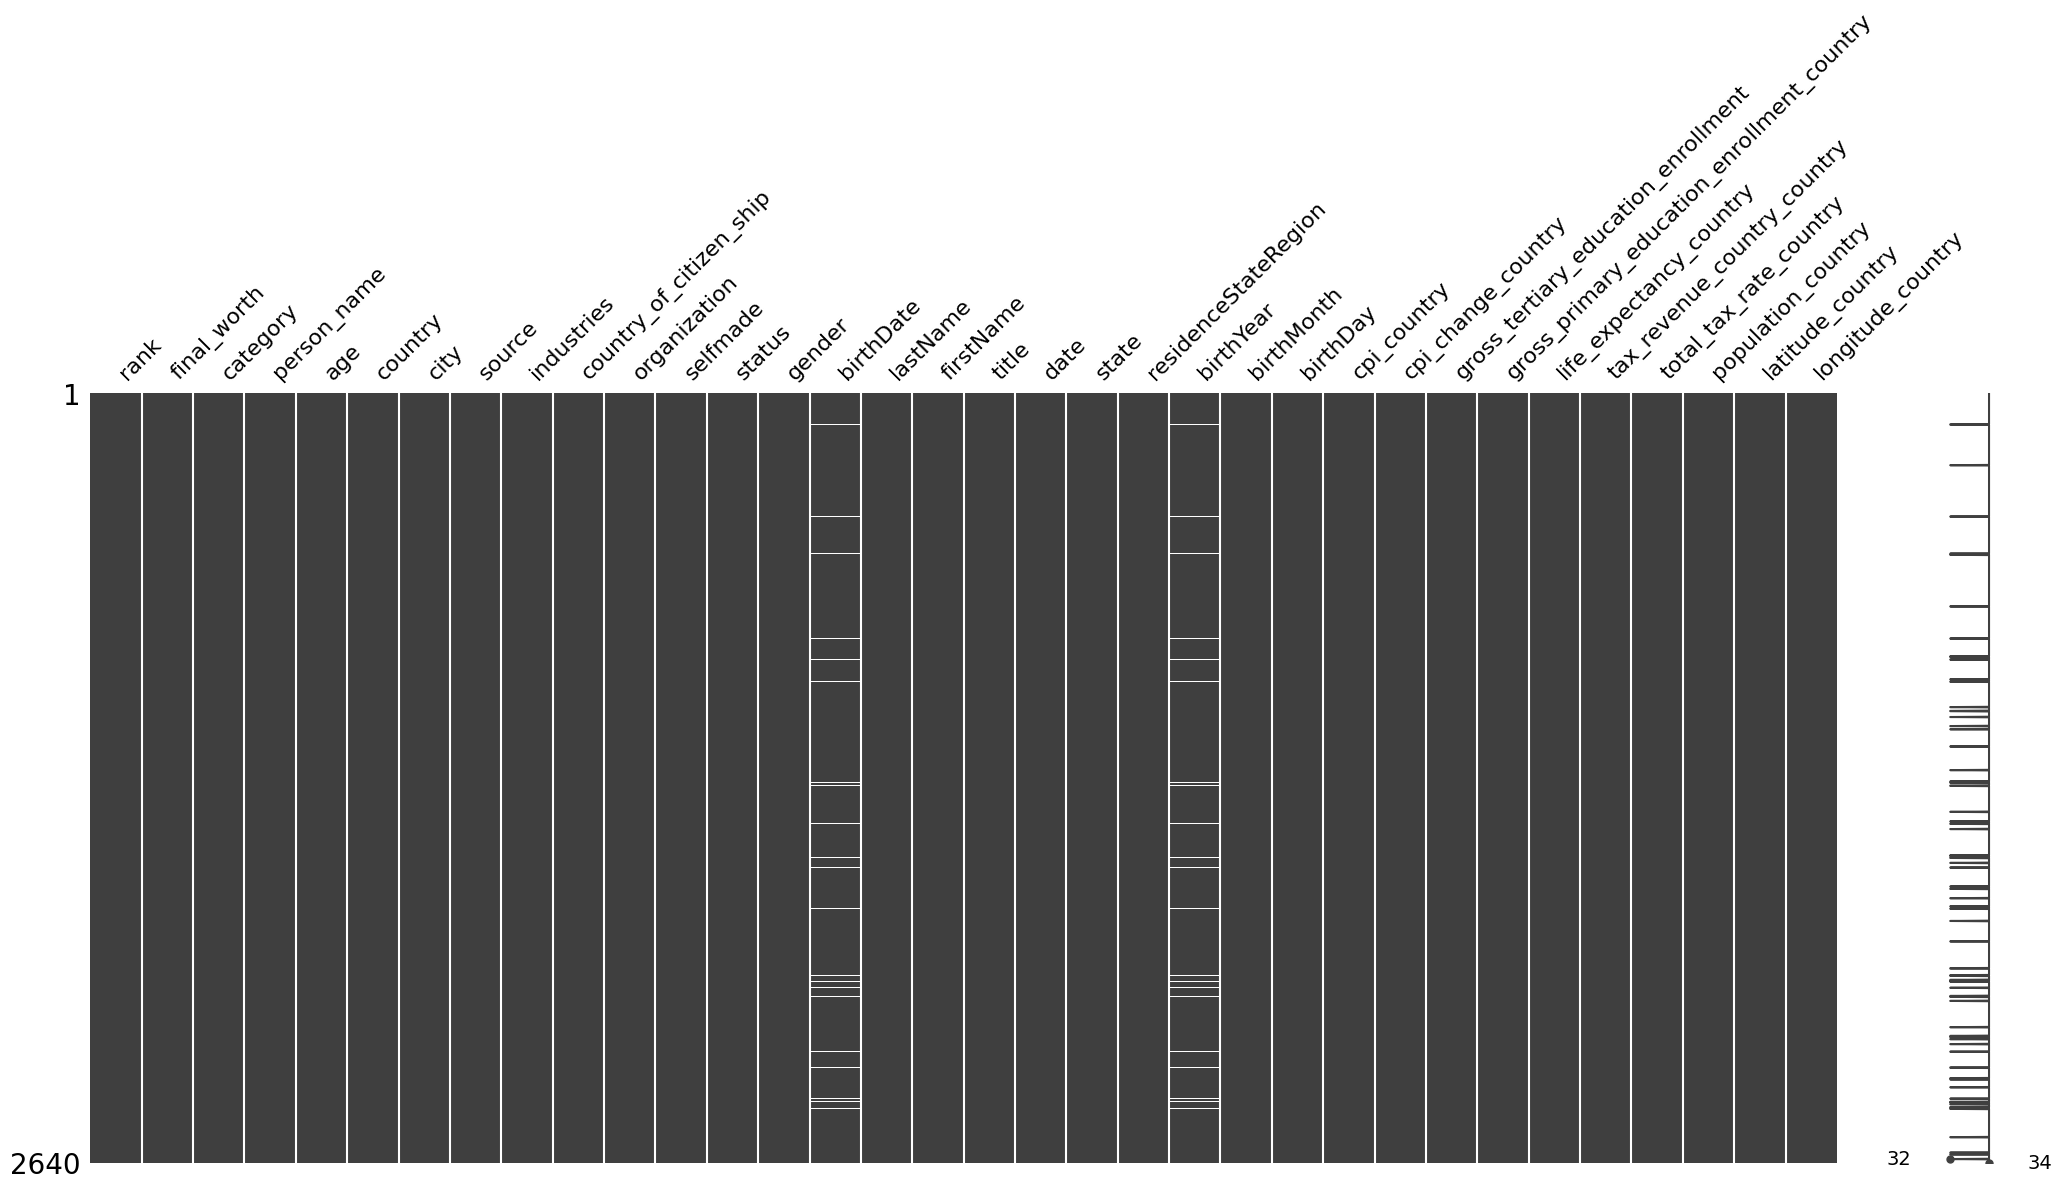

In [43]:
ms.matrix(df_bilionarios_clean)

<Axes: >

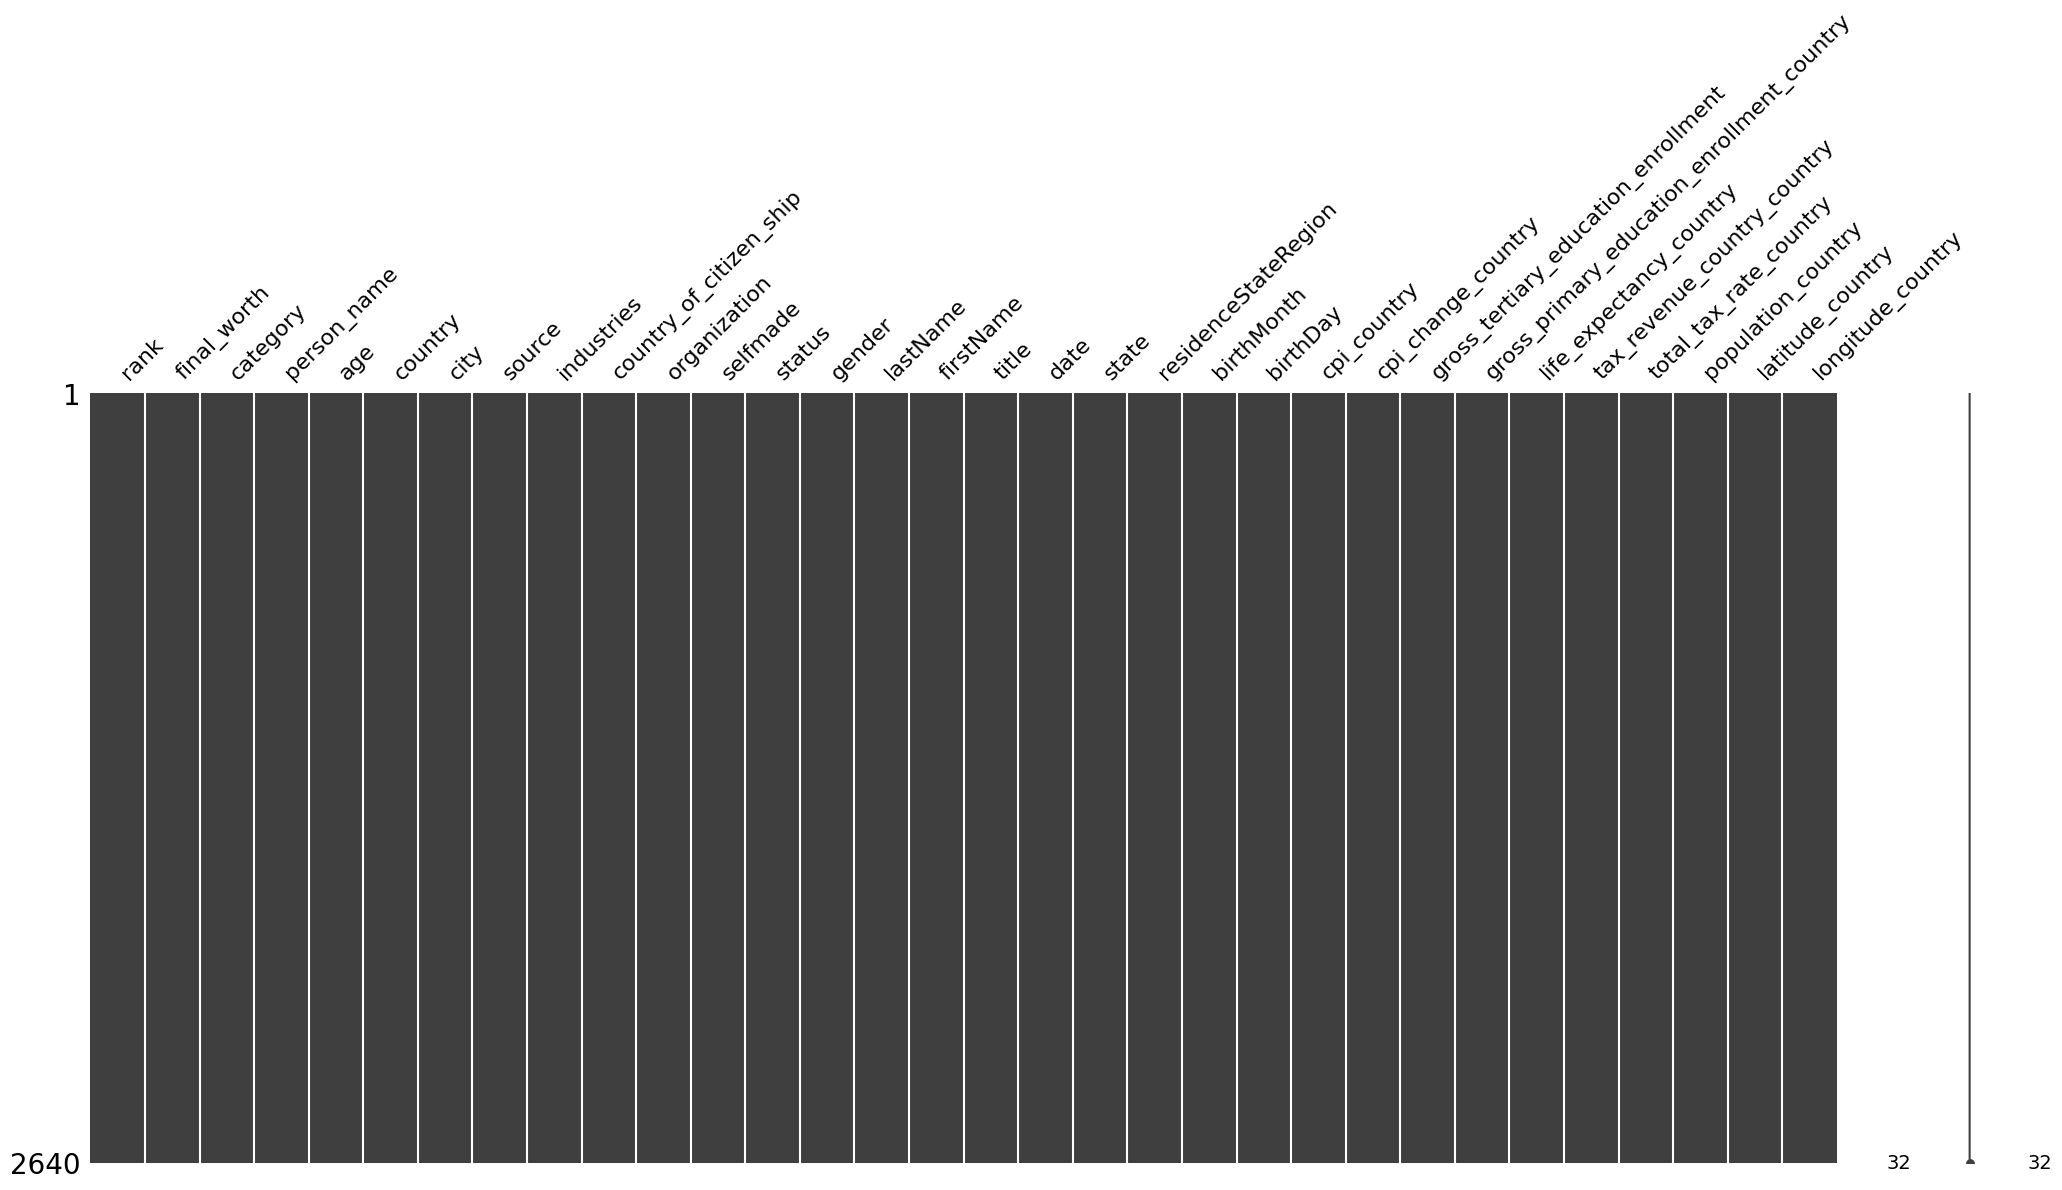

In [44]:
# removendo as colunas 'birthDate' e 'birthYear'
df_bilionarios_clean.drop(['birthDate', 'birthYear'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(df_bilionarios_clean)

# 5. Análise Exlporatória

Na fase de análise exploratória, iremos utilizar o dataframe após o processo de limpeza, visando concluir de maneira assertiva nossas análises objetivas da base de dados.

**Distribuição de Bilionários por Gênero**

Text(0.5, 1.0, 'Proporção de bilionários por Gênero')

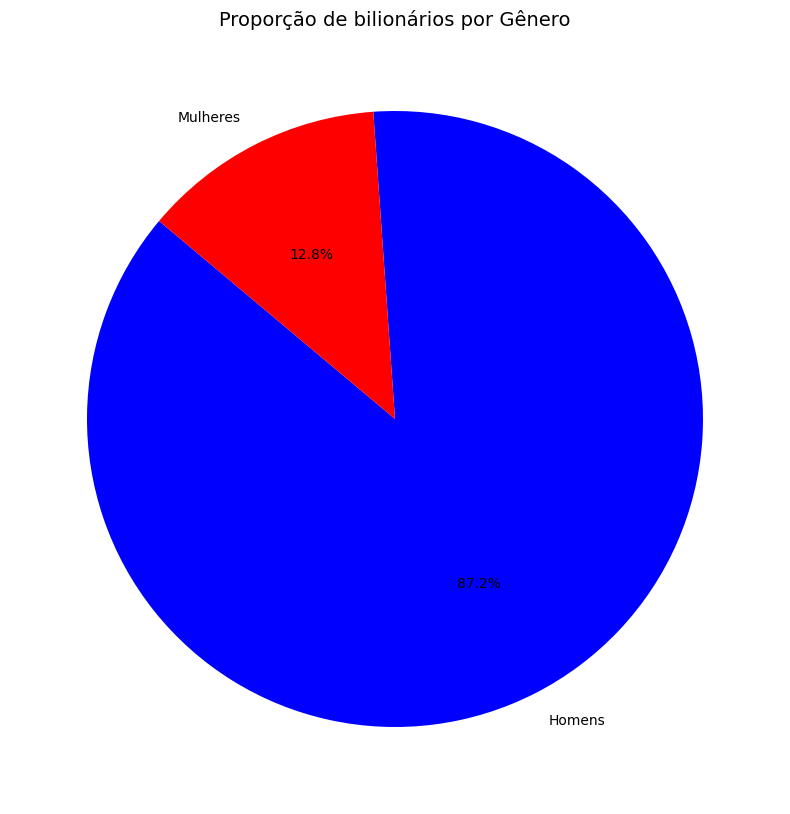

In [46]:
# Gráfico para comparação de bilionários por gênero

gender = df_bilionarios_clean["gender"].value_counts()
gender_pro= pd.DataFrame({"frequency": gender, "percentage": gender/(gender.sum())*100})

labels = ['Homens', 'Mulheres']
colors = ['blue', 'red']

plt.figure(figsize=(10,10))
plt.pie(gender, labels=labels, colors=colors, autopct= "%1.1f%%", startangle=140)

plt.title("Proporção de bilionários por Gênero", fontsize=14)

**Distribuição de Bilionários por Idade**

Text(0, 0.5, 'Total')

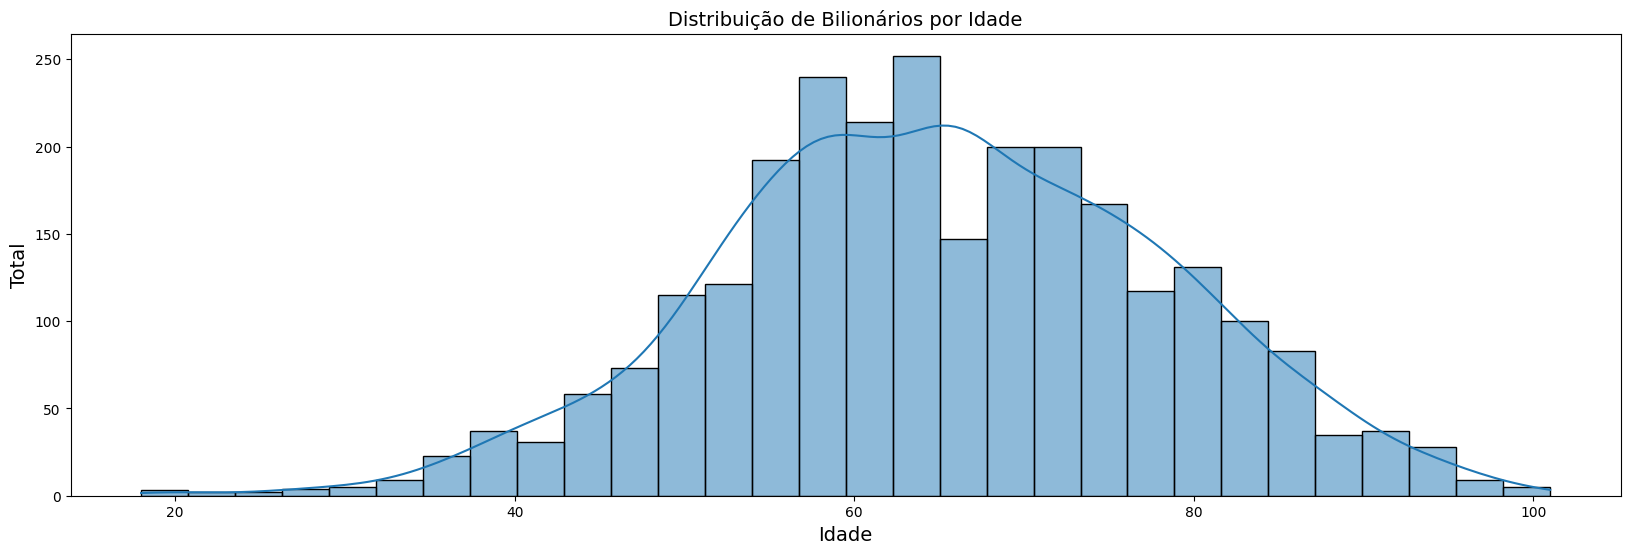

In [47]:
plt.figure(figsize=(20,6))
sns.histplot(data=df_bilionarios_clean, x="age", bins=30, kde=True)
plt.title("Distribuição de Bilionários por Idade", fontsize=14)
plt.xlabel("Idade", fontsize=14)
plt.ylabel("Total", fontsize=14)

**Distribuição de Bilionários por país de origem**

Text(0, 0.5, 'Quantidade de Bilionários')

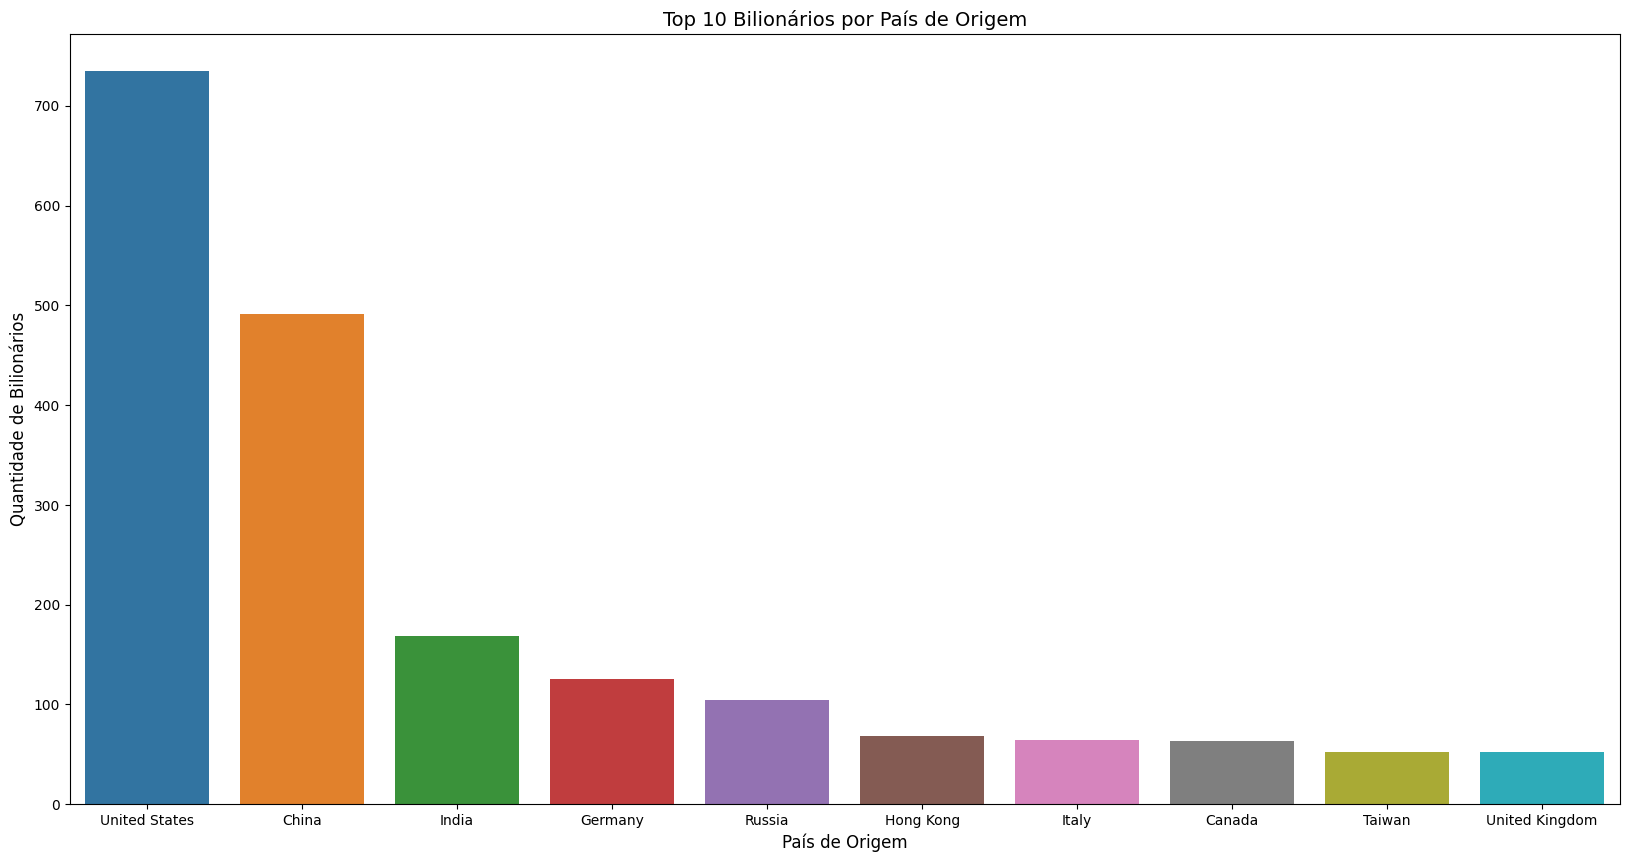

In [48]:
# Gráfico para apresentar o top 10 de país de origem

top_country_of_citizen_ship = df_bilionarios_clean['country_of_citizen_ship'].value_counts().head(10)

plt.figure(figsize=(20,10))
sns.barplot(x=top_country_of_citizen_ship.index, y=top_country_of_citizen_ship)
plt.title("Top 10 Bilionários por País de Origem", fontsize=14)
plt.xlabel("País de Origem", fontsize=12)
plt.ylabel("Quantidade de Bilionários", fontsize=12)



**Top 10 por área de atuação**

Text(0, 0.5, 'Quantidade de Bilionários')

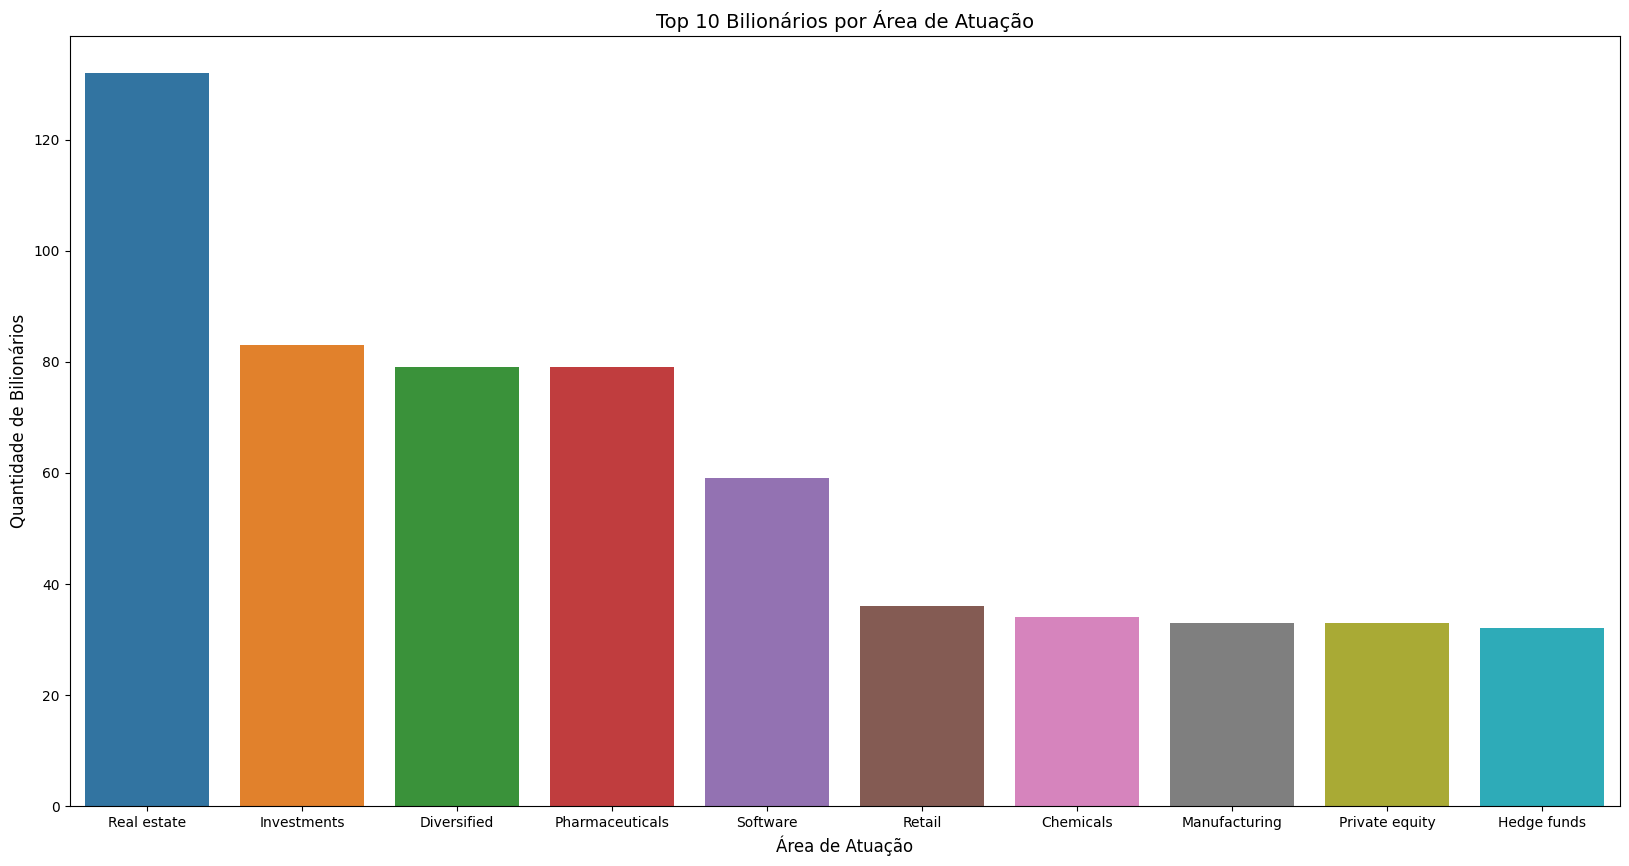

In [49]:
top_industry = df_bilionarios_clean['source'].value_counts().head(10)
plt.figure(figsize=(20,10))
sns.barplot(x=top_industry.index, y=top_industry)
plt.title("Top 10 Bilionários por Área de Atuação", fontsize=14)
plt.xlabel("Área de Atuação", fontsize=12)
plt.ylabel("Quantidade de Bilionários", fontsize=12)




**5.4 Distribuição por Indústria**

<Figure size 2500x2000 with 0 Axes>

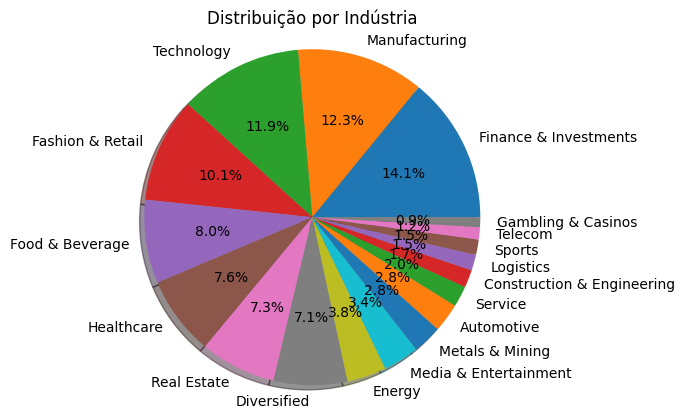

In [50]:
# Contando os valores de Indústrias

industries_counts = df_bilionarios_clean['industries'].value_counts()

# Traçar o gráfico de pizza

labels = industries_counts.index
sizes = industries_counts.values

fig = plt.figure(figsize=(25, 20))

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=360)

ax1.axis('equal')

plt.title("Distribuição por Indústria")

plt.show()

# Conclusão

Nesse MVP analisamos dados sobre a elite dos bilionários globais, explorando algumas questões.

A base continha informações relevantes e apresentou pouco problema de qualidade do dado.

Ao analisar os dados por gênero, evidenciamos uma grande disparidade. Embora tenhamosum aumento na presença feminina entre os bilionários, a representação ainda é desigual. Isso ressalta que como reflexo da sociedade em que vivemos, não é diferente no seleto grupo da elite bilionário. A análise detalhada da idade dos bilionários revelou que predominante pessoas acima dos 40 anos.

Por fim, esta análise vai além de números e estatísticas, ela revela histórias sobre a sociedade, economia e aspirações individuais.

Ao incorporar Analise de Dados e boas práticas, foi visto uma forma mais ágil e fácil de tratar os dados e ter as informações da qualidade da sua base de dados.

